# Using the traditional method by building a neural network from scratch

In [1]:
import keras
from keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img, load_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Dense
from keras import backend as K

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
import time

In [3]:
img_width, img_height = 200, 200
train_data_dir = ("E:\\Rashmeet_SJSU\\Sem IV\\CS 298\\subset_data\\train")
validation_data_dir = ("E:\\Rashmeet_SJSU\\Sem IV\\CS 298\\subset_data\\validation")
nb_train_samples = 3039
nb_validation_samples = 600
epochs = 50
batch_size = 16

In [4]:
K.image_data_format()

'channels_last'

In [6]:
start_time = time.time()
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)
print(input_shape)
print("time taken = ", time.time() - start_time)

#Input shape represents widht, height, and channels
#Here channels value is 3 cuz of R, G, B

(200, 200, 3)
time taken =  0.0039997100830078125


In [7]:
model = Sequential()

In [8]:
#(3,3) is the filter -> since the input image is of depth 3 i.e. RGB, the filter will also be 3x3
#32 represents the number of filters applied for depth
#Filter takes input the 3D image and gives output corresponding 2D image for the same - https://www.youtube.com/watch?v=m8pOnJxOcqY&t=7s

model.add(Conv2D(32, (3,3), input_shape = input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


In [9]:
model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [10]:
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [11]:
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

In [12]:
model.add(Dense(1))
model.add(Activation('sigmoid'))


In [13]:
model.compile(loss='binary_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])

In [14]:
train_datagen = ImageDataGenerator(rescale=1/255,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True
                                  )

In [15]:
test_datagen= ImageDataGenerator(rescale=1/255)

In [16]:
train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                    target_size = (img_width, img_height),
                                                    batch_size= batch_size,
                                                    class_mode = 'binary'
                                                   )

Found 3039 images belonging to 2 classes.


In [17]:
validation_generator = test_datagen.flow_from_directory(validation_data_dir,
                                                       target_size = (img_width, img_height),
                                                       batch_size = batch_size,
                                                       class_mode = 'binary')

Found 600 images belonging to 2 classes.


In [ ]:
start_time = time.time()
history_traditional_cnn = model.fit_generator(train_generator,
                   steps_per_epoch = nb_train_samples // batch_size,
                    epochs = epochs,
                    validation_data = validation_generator,
                    validation_steps = 4
                   )

print("Time taken by traditional CNN process = ", time.time()-start_time)

Epoch 1/50
189/189 [==============================] - 228s 1s/step - loss: 0.6634 - acc: 0.6923 - val_loss: 0.5159 - val_acc: 0.7344
Epoch 2/50
189/189 [==============================] - 225s 1s/step - loss: 0.5629 - acc: 0.7351 - val_loss: 0.5137 - val_acc: 0.7656
Epoch 3/50
189/189 [==============================] - 220s 1s/step - loss: 0.5265 - acc: 0.7502 - val_loss: 0.5183 - val_acc: 0.7656
Epoch 4/50
189/189 [==============================] - 223s 1s/step - loss: 0.4895 - acc: 0.7837 - val_loss: 0.5040 - val_acc: 0.8438
Epoch 5/50
189/189 [==============================] - 249s 1s/step - loss: 0.4444 - acc: 0.8138 - val_loss: 0.5089 - val_acc: 0.7812
Epoch 6/50
148/189 [======================>.......] - ETA: 50s - loss: 0.4159 - acc: 0.8263

# Using transfer learning with a pre-trained VGG16 model

In [12]:
from keras import applications
from keras import regularizers
import numpy as np 

In [13]:
model_imgnet = applications.VGG16(include_top=False, weights='imagenet')

In [14]:
bottleneck_features_train = model_imgnet.predict_generator(
    train_generator,
    nb_train_samples // batch_size
)

In [15]:
np.save(open('E:\\Rashmeet_SJSU\\Sem IV\\CS 298\\subset_data\\subset_bottleneck_features_train.npy', 'wb'),
        bottleneck_features_train)

In [16]:
bottleneck_features_validation = model_imgnet.predict_generator(
    validation_generator,
    nb_validation_samples // batch_size
)

In [17]:
np.save(open('E:\\Rashmeet_SJSU\\Sem IV\\CS 298\\subset_data\\subset_bottleneck_features_test.npy', 'wb'),
        bottleneck_features_validation)

In [32]:
train_data = np.load(open('E:\\Rashmeet_SJSU\\Sem IV\\CS 298\\subset_data\\subset_bottleneck_features_train.npy',
                          'rb'
                          ))

In [42]:
train_labels = np.array([0] * 2130  + [1] * 894)

In [35]:
validation_data = np.load(open('E:\\Rashmeet_SJSU\\Sem IV\\CS 298\\subset_data\\subset_bottleneck_features_test.npy',
                               'rb'
                          ))

In [47]:
validation_labels = np.array([0]*492 + [1]*100)

In [54]:
# model = Sequential()
# model.add(Flatten(input_shape=train_data.shape[1:]))
# model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
# model.add(Dense(1, activation='sigmoid'))


model = Sequential()
model.add(Flatten(input_shape=train_data.shape[1:]))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [55]:
# model.compile(optimizer='adam',
#               loss='binary_crossentropy',
#               metrics=['accuracy'])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [57]:
model.fit(train_data, train_labels,
          epochs=epochs,
          batch_size=batch_size,
          validation_data=(validation_data, validation_labels))

Train on 3024 samples, validate on 592 samples
Epoch 1/50
3024/3024 [==============================] - 18s 6ms/step - loss: 0.5409 - acc: 0.7189 - val_loss: 0.5840 - val_acc: 0.7889
Epoch 2/50
3024/3024 [==============================] - 18s 6ms/step - loss: 0.5528 - acc: 0.7173 - val_loss: 0.5916 - val_acc: 0.7905
Epoch 3/50
3024/3024 [==============================] - 18s 6ms/step - loss: 0.5370 - acc: 0.7189 - val_loss: 0.5803 - val_acc: 0.8041
Epoch 4/50
3024/3024 [==============================] - 18s 6ms/step - loss: 0.5158 - acc: 0.7315 - val_loss: 0.6268 - val_acc: 0.7686
Epoch 5/50
3024/3024 [==============================] - 18s 6ms/step - loss: 0.5196 - acc: 0.7315 - val_loss: 0.6275 - val_acc: 0.7534
Epoch 6/50
3024/3024 [==============================] - 19s 6ms/step - loss: 0.5168 - acc: 0.7285 - val_loss: 0.6526 - val_acc: 0.7534
Epoch 7/50
3024/3024 [==============================] - 18s 6ms/step - loss: 0.5032 - acc: 0.7421 - val_loss: 0.6524 - val_acc: 0.7787
Epoch 8/

In [58]:
model.save_weights('bottleneck_subset_model.h5')

# Test on appliance and furniture images

In [59]:
from IPython.display import Image

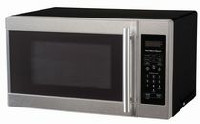

In [60]:
Image(filename="E:\\Rashmeet_SJSU\\Sem IV\\CS 298\\data\\appliances\\07 (1).jpg")

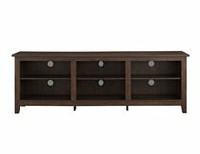

In [97]:
Image(filename='E:\\Rashmeet_SJSU\\Sem IV\\CS 298\\data\\furniture\\19.jpg')

In [61]:
def load_image(infilename):
    from PIL import Image
    img = Image.open(infilename)
    img.load()
    data = np.asarray(img,dtype="int32")
    return data

In [74]:
test_img = load_image("E:\\Rashmeet_SJSU\\Sem IV\\CS 298\\data\\appliances\\07 (1).jpg")
test_img1 = load_image('E:\\Rashmeet_SJSU\\Sem IV\\CS 298\\data\\furniture\\19.jpg')

In [63]:
test_img.shape

(124, 200, 3)

In [75]:
test_img1.shape

(154, 200, 3)

In [64]:
from keras.preprocessing import image

In [81]:
#resize appliance image
img_original = image.array_to_img(test_img, scale=False)
desired_width, desired_height = 200, 200
width, height = 124, 200
#start_x = np.maximum(0, int((width-desired_width)/2))
#img = img_original.crop((start_x, np.maximum(0, -1), start_x+desired_width, height))
img = img_original.resize((200, 200))
img_arr = image.img_to_array(img)/255
img_arr.shape

(200, 200, 3)

In [91]:
#resize furniture image
img_original1 = image.array_to_img(test_img1, scale=False)
desired_width, desired_height = 200, 200
width, height = 124, 200
#start_x = np.maximum(0, int((width-desired_width)/2))
#img = img_original.crop((start_x, np.maximum(0, -1), start_x+desired_width, height))
img1 = img_original1.resize((200, 200))
img_arr1 = image.img_to_array(img1)/255
img_arr1.shape

(200, 200, 3)

In [83]:
features = model_imgnet.predict(img_arr.reshape(1, desired_width, desired_height, 3))
features.shape

(1, 6, 6, 512)

In [92]:
features1 = model_imgnet.predict(img_arr1.reshape(1, desired_width, desired_height, 3))
features1.shape

(1, 6, 6, 512)

In [85]:
predictions = model.predict(features)

In [86]:
predictions[0][0] < 0.5

True

In [87]:
model.predict_classes(features)

array([[0]])

In [93]:
predictions1 = model.predict(features1)

In [94]:
predictions1[0][0] < 0.5

False

In [95]:
model.predict_classes(features1)

array([[1]])

In [96]:
train_generator.class_indices

{'appliances': 0, 'furniture': 1}